In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [34]:
data, columns = parse_arff('drive/MyDrive/content/Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)

In [36]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [7]:
loss_fn = keras.losses.Huber(delta=1.0)
activation = ['softplus', 'softsign', 'selu', 'elu', 'exponential', 'tanh', 'sigmoid', 'relu']
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
binary_loss = ['binary_crossentropy', 'hinge', 'squared_hinge', loss_fn]

In [ ]:
keras_models = []
for acti in activation:
  model = keras.Sequential()
  model.add(Dense(64, input_shape = (30,),  activation='relu'))
  model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128,  activation='relu'))
  model.add(Dense(1,activation=acti))
  keras_models.append(model)

In [ ]:
train_acc = []
train_loss = []
val_acc = []
val_loss = []

for m in keras_models:
  for opt in optimizers:
    m.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    modelhistory = m.fit(x_train, y_train, epochs = 30, validation_data=(x_test, y_test))
    train_acc.append(modelhistory.history['accuracy'])
    val_acc.append(modelhistory.history['val_accuracy'])
    train_loss.append(modelhistory.history['loss']) 
    val_loss.append(modelhistory.history['val_loss'])

In [ ]:
train_acc = np.array(train_acc)
val_acc = np.array(val_acc)
train_loss = np.array(train_loss)
val_loss = np.array(val_loss)

In [ ]:
combi = []
for m in activation:
  for opt in optimizers:
    combi.append(m + ' ' + opt)
best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []
for i in range(train_acc.shape[0]):
  best_accuracy_train.append(np.max(train_acc[i,:]))
  last_accuracy_train.append(train_acc[i,-1])
  best_accuracy_val.append(np.max(val_acc[i,:]))
  last_accuracy_val.append(val_acc[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

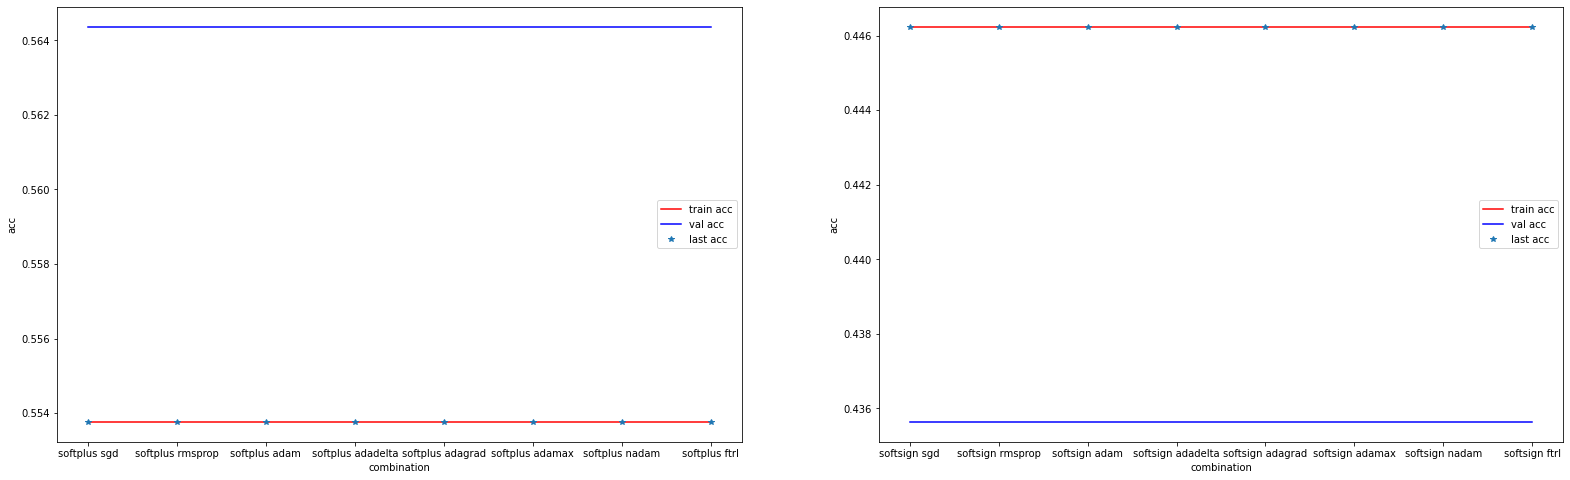

In [ ]:
plt.figure(figsize=(27, 8))
plt.subplot(1,2,1) 
plt.plot(combi[:8], best_accuracy_train[:8], 'r', label='train acc')
plt.plot(combi[:8], best_accuracy_val[:8], 'b', label='val acc')
plt.plot(combi[:8], last_accuracy_train[:8], '*', label='last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()


plt.subplot(1,2,2) 
plt.plot(combi[8:16], best_accuracy_train[8:16], 'r', label='train acc')
plt.plot(combi[8:16], best_accuracy_val[8:16], 'b', label='val acc')
plt.plot(combi[8:16], last_accuracy_train[8:16], '*', label='last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

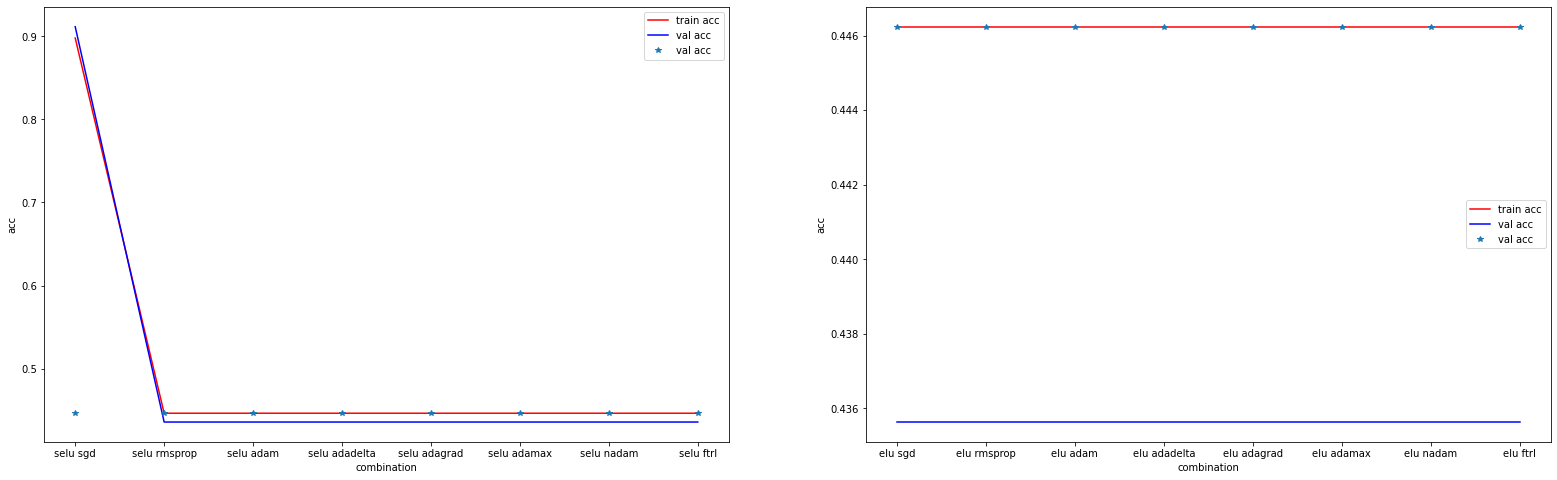

In [ ]:
plt.figure(figsize=(27, 8))
plt.subplot(1,2,1) 
plt.plot(combi[16:24], best_accuracy_train[16:24], 'r', label='train acc')
plt.plot(combi[16:24], best_accuracy_val[16:24], 'b', label='val acc')
plt.plot(combi[16:24], last_accuracy_train[16:24], '*', label='val acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()


plt.subplot(1,2,2) 
plt.plot(combi[24:32], best_accuracy_train[24:32], 'r', label='train acc')
plt.plot(combi[24:32], best_accuracy_val[24:32], 'b', label='val acc')
plt.plot(combi[24:32], last_accuracy_train[24:32], '*', label='val acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

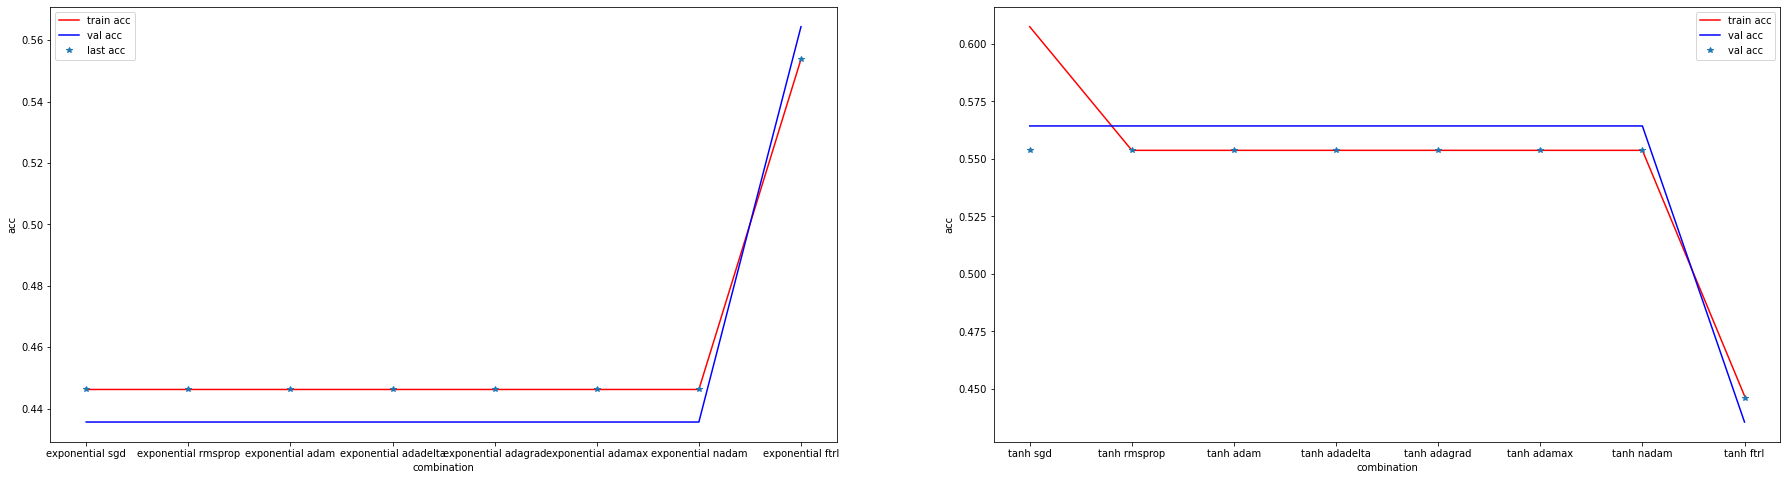

In [ ]:
plt.figure(figsize=(31, 8))
plt.subplot(1,2,1) 
plt.plot(combi[32:40], best_accuracy_train[32:40], 'r', label='train acc')
plt.plot(combi[32:40], best_accuracy_val[32:40], 'b', label='val acc')
plt.plot(combi[32:40], last_accuracy_train[32:40], '*', label='last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

plt.subplot(1,2,2) 
plt.plot(combi[40:48], best_accuracy_train[40:48], 'r', label='train acc')
plt.plot(combi[40:48], best_accuracy_val[40:48], 'b', label='val acc')
plt.plot(combi[40:48], last_accuracy_train[40:48], '*', label='val acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

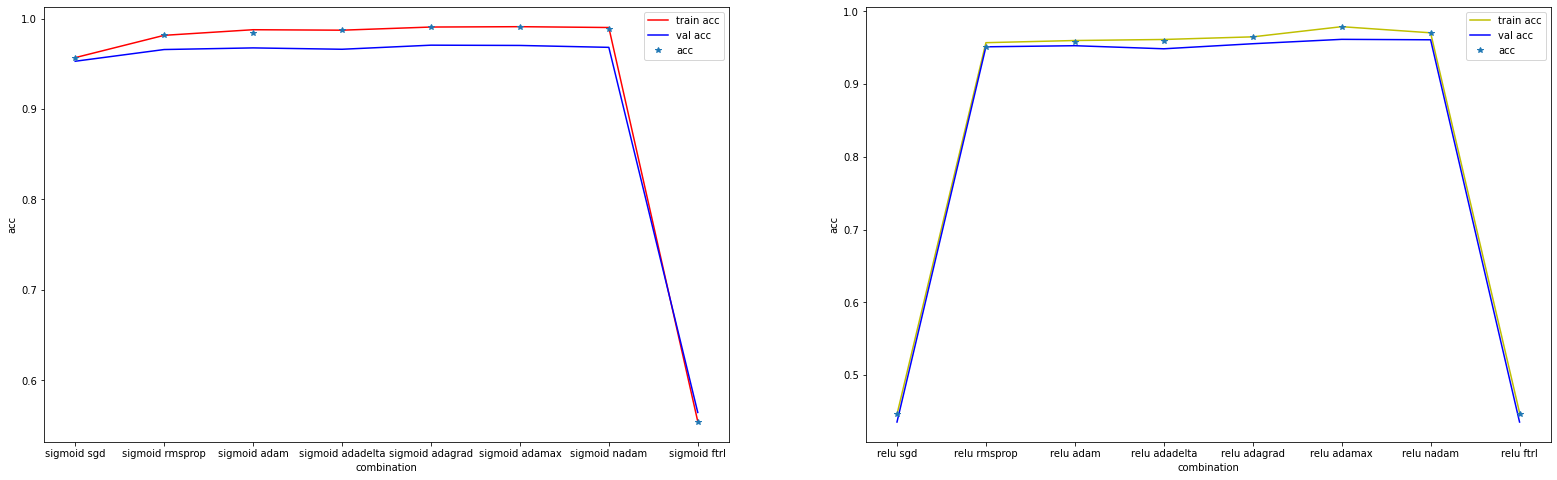

In [ ]:
plt.figure(figsize=(27, 8))

plt.subplot(1,2,1) 
plt.plot(combi[48:56], best_accuracy_train[48:56], 'r', label='train acc')
plt.plot(combi[48:56], best_accuracy_val[48:56], 'b', label='val acc')
plt.plot(combi[48:56], last_accuracy_train[48:56], '*', label='acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

plt.subplot(1,2,2) 
plt.plot(combi[56:64], best_accuracy_train[56:64], 'y', label='train acc')
plt.plot(combi[56:64], best_accuracy_val[56:64], 'b', label='val acc')
plt.plot(combi[56:64], last_accuracy_train[56:64], '*', label='acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [ ]:
activation_avg_train = []
activation_avg_val = []
activation_avg_t_last = []
activation_avg_v_last = []

for i in range(8):
  activation_avg_train.append(sum(best_accuracy_train[i*8:(i+1)*8])/8)
  activation_avg_val.append(sum(best_accuracy_val[i*8:(i+1)*8])/8)
  activation_avg_t_last.append(sum(last_accuracy_train[i*8:(i+1)*8])/8)
  activation_avg_v_last.append(sum(last_accuracy_val[i*8:(i+1)*8])/8)

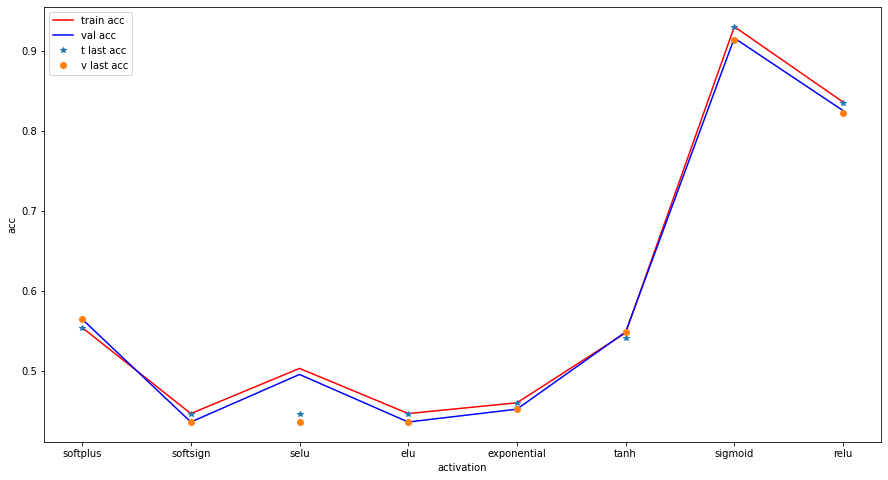

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(activation, activation_avg_train, 'r', label='train acc')
plt.plot(activation, activation_avg_val, 'b', label='val acc')
plt.plot(activation, activation_avg_t_last, '*', label='t last acc')
plt.plot(activation, activation_avg_v_last, 'o', label='v last acc')
plt.xlabel('activation')
plt.ylabel('acc')
plt.legend()

In [ ]:
np.argmax(best_accuracy_train), np.max(best_accuracy_train), np.argmax(last_accuracy_train), np.max(last_accuracy_train), np.argmax(best_accuracy_val), np.max(best_accuracy_val), np.argmax(last_accuracy_val), np.max(last_accuracy_val)

(53,
 0.9912121891975403,
 53,
 0.9909537434577942,
 52,
 0.9707567095756531,
 52,
 0.9707567095756531)

In [ ]:
np.argmin(best_accuracy_train), np.min(best_accuracy_train), np.argmin(last_accuracy_train), np.min(last_accuracy_train), np.argmin(best_accuracy_val), np.min(best_accuracy_val), np.argmin(last_accuracy_val), np.min(last_accuracy_val)

(8,
 0.4462393522262573,
 8,
 0.4462393522262573,
 8,
 0.4356346130371094,
 8,
 0.4356346130371094)

In [ ]:
best_accuracy_train - last_accuracy_train, best_accuracy_val - last_accuracy_val

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.51796293e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.37606478e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.75367022e-04,
        0.00000000e+00, 0.00000000e+00, 3.87698412e-03, 0.00000000e+00,
        1.29222870e-04, 2.58445740e-04, 1.16306543e-03, 6.461739

In [ ]:
keras_models = []
for acti in activation:
  model = keras.Sequential()
  model.add(keras.layers.LSTM(128, activation='relu',return_sequences=True, input_shape=(1,30)))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.LSTM(256, activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(250,activation='relu'))
  model.add(keras.layers.Dense(1,activation=acti))
  keras_models.append(model)

In [ ]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))

In [ ]:
train_acc_r1 = []
val_acc_r1 = []
train_loss_r1 = []
val_loss_r1 = []
for m in keras_models[3:]:
  for opt in optimizers:
      m.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
      modelhistory = m.fit(x, y_train, epochs = 30, validation_data=(xx, y_test))
      train_acc_r1.append(modelhistory.history['accuracy'])
      val_acc_r1.append(modelhistory.history['val_accuracy'])
      train_loss_r1.append(modelhistory.history['loss']) 
      val_loss_r1.append(modelhistory.history['val_loss'])

In [ ]:
recurrent_train_acc = []
recurrent_val_acc = []
recurrent_train_loss = []
recurrent_val_loss = []

for i in range(train_acc_r.shape[0]):
  recurrent_train_acc.append(train_acc_r[i,:])
  recurrent_val_acc.append(val_acc_r[i,:])
  recurrent_train_loss.append(train_loss_r[i,:])
  recurrent_val_loss.append(val_loss_r[i,:])


for i in range(train_acc_r1.shape[0]):
  recurrent_train_acc.append(train_acc_r1[i,:])
  recurrent_val_acc.append(np.array(val_acc_r1)[i,:])
  recurrent_train_loss.append(np.array(train_loss_r1)[i,:])
  recurrent_val_loss.append(np.array(val_loss_r1)[i,:])

In [ ]:
best_accuracy_train_r = []
last_accuracy_train_r = []
best_accuracy_val_r = []
last_accuracy_val_r = []

for i in range(np.array(recurrent_train_acc).shape[0]):
  best_accuracy_train_r.append(np.max(np.array(recurrent_train_acc)[i,:]))
  last_accuracy_train_r.append(np.array(recurrent_train_acc)[i,-1])
  best_accuracy_val_r.append(np.max(np.array(recurrent_val_acc)[i,:]))
  last_accuracy_val_r.append(np.array(recurrent_val_acc)[i,-1])

best_accuracy_train_r = np.array(best_accuracy_train_r)
last_accuracy_train_r = np.array(last_accuracy_train_r)
best_accuracy_val_r = np.array(best_accuracy_val_r)
last_accuracy_val_r = np.array(last_accuracy_val_r)

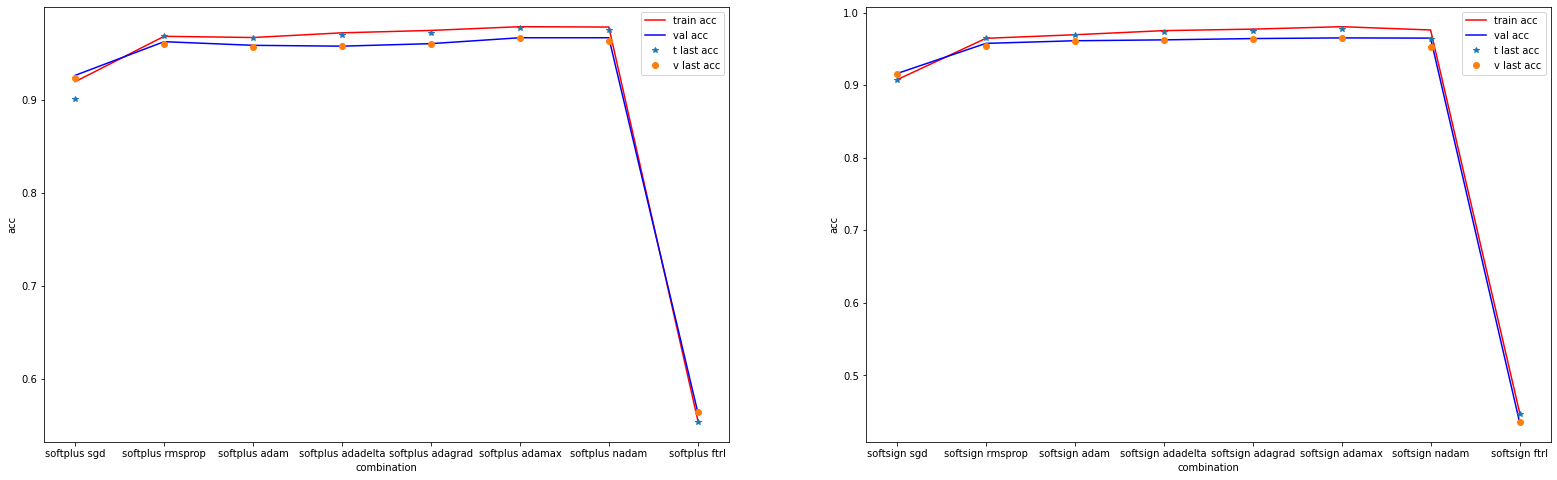

In [ ]:
plt.figure(figsize=(27, 8))
plt.subplot(1,2,1) 
plt.plot(combi[:8], best_accuracy_train_r[:8], 'r', label='train acc')
plt.plot(combi[:8], best_accuracy_val_r[:8], 'b', label='val acc')
plt.plot(combi[:8], last_accuracy_train_r[:8], '*', label='t last acc')
plt.plot(combi[:8], last_accuracy_val_r[:8], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()


plt.subplot(1,2,2) 
plt.plot(combi[8:16], best_accuracy_train_r[8:16], 'r', label='train acc')
plt.plot(combi[8:16], best_accuracy_val_r[8:16], 'b', label='val acc')
plt.plot(combi[8:16], last_accuracy_train_r[8:16], '*', label='t last acc')
plt.plot(combi[8:16], last_accuracy_val_r[8:16], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

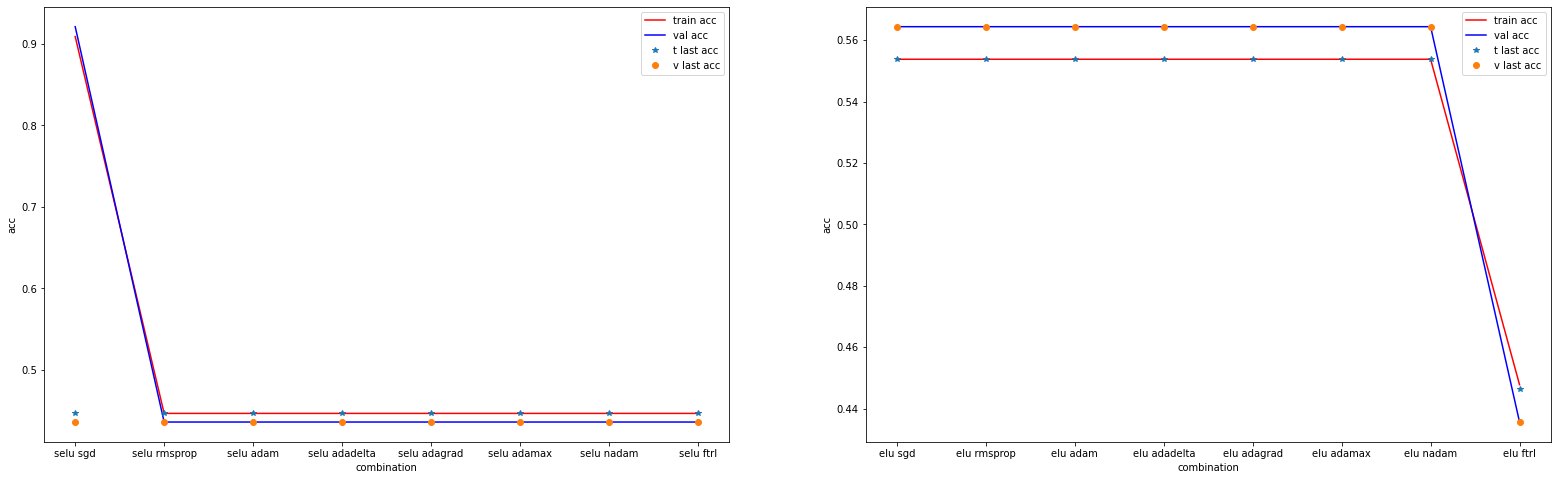

In [ ]:
plt.figure(figsize=(27, 8))
plt.subplot(1,2,1) 
plt.plot(combi[16:24], best_accuracy_train_r[16:24], 'r', label='train acc')
plt.plot(combi[16:24], best_accuracy_val_r[16:24], 'b', label='val acc')
plt.plot(combi[16:24], last_accuracy_train_r[16:24], '*', label='t last acc')
plt.plot(combi[16:24], last_accuracy_val_r[16:24], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()


plt.subplot(1,2,2) 
plt.plot(combi[24:32], best_accuracy_train_r[24:32], 'r', label='train acc')
plt.plot(combi[24:32], best_accuracy_val_r[24:32], 'b', label='val acc')
plt.plot(combi[24:32], last_accuracy_train_r[24:32], '*', label='t last acc')
plt.plot(combi[24:32], last_accuracy_val_r[24:32], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

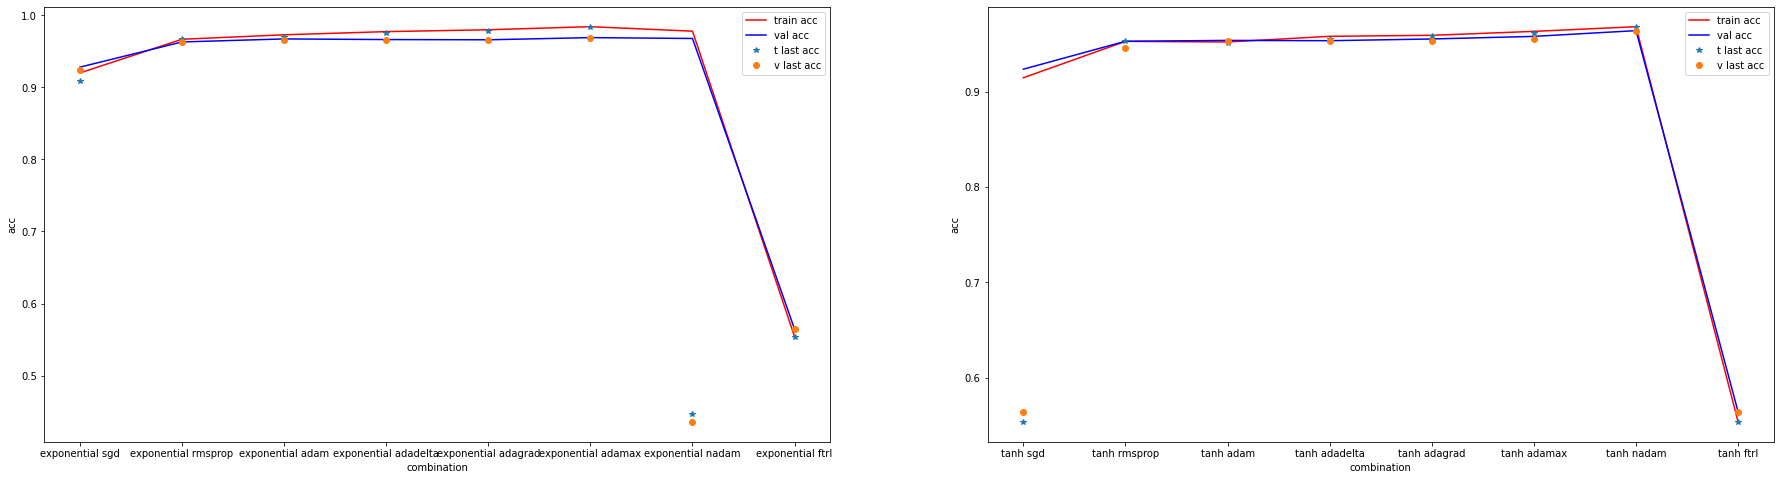

In [ ]:
plt.figure(figsize=(31, 8))
plt.subplot(1,2,1) 
plt.plot(combi[32:40], best_accuracy_train_r[32:40], 'r', label='train acc')
plt.plot(combi[32:40], best_accuracy_val_r[32:40], 'b', label='val acc')
plt.plot(combi[32:40], last_accuracy_train_r[32:40], '*', label='t last acc')
plt.plot(combi[32:40], last_accuracy_val_r[32:40], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

plt.subplot(1,2,2) 
plt.plot(combi[40:48], best_accuracy_train_r[40:48], 'r', label='train acc')
plt.plot(combi[40:48], best_accuracy_val_r[40:48], 'b', label='val acc')
plt.plot(combi[40:48], last_accuracy_train_r[40:48], '*', label='t last acc')
plt.plot(combi[40:48], last_accuracy_val_r[40:48], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

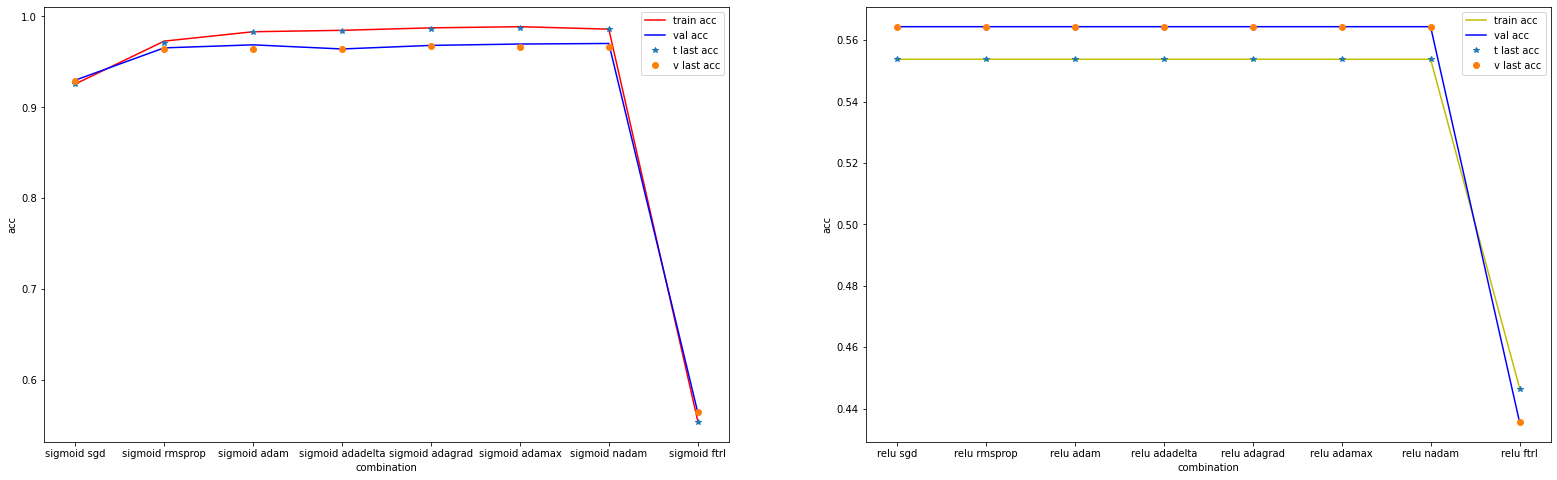

In [ ]:
plt.figure(figsize=(27, 8))

plt.subplot(1,2,1) 
plt.plot(combi[48:56], best_accuracy_train_r[48:56], 'r', label='train acc')
plt.plot(combi[48:56], best_accuracy_val_r[48:56], 'b', label='val acc')
plt.plot(combi[48:56], last_accuracy_train_r[48:56], '*', label='t last acc')
plt.plot(combi[48:56], last_accuracy_val_r[48:56], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

plt.subplot(1,2,2)
plt.plot(combi[56:64], best_accuracy_train_r[56:64], 'y', label='train acc')
plt.plot(combi[56:64], best_accuracy_val_r[56:64], 'b', label='val acc')
plt.plot(combi[56:64], last_accuracy_train_r[56:64], '*', label='t last acc')
plt.plot(combi[56:64], last_accuracy_val_r[56:64], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

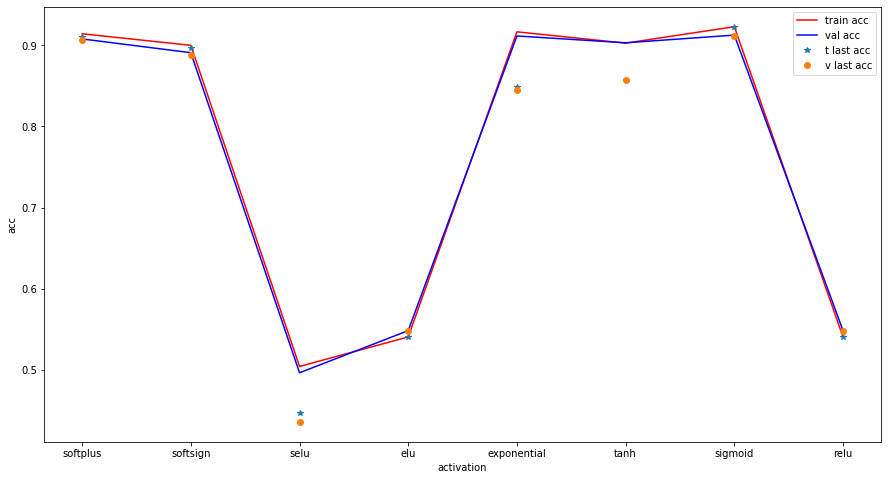

In [ ]:
activation_avg_train_r = []
activation_avg_val_r = []
activation_avg_t_last_r = []
activation_avg_v_last_r = []

for i in range(8):
  activation_avg_train_r.append(sum(best_accuracy_train_r[i*8:(i+1)*8])/8)
  activation_avg_val_r.append(sum(best_accuracy_val_r[i*8:(i+1)*8])/8)
  activation_avg_t_last_r.append(sum(last_accuracy_train_r[i*8:(i+1)*8])/8)
  activation_avg_v_last_r.append(sum(last_accuracy_val_r[i*8:(i+1)*8])/8)

plt.figure(figsize=(15,8))
plt.plot(activation, activation_avg_train_r, 'r', label='train acc')
plt.plot(activation, activation_avg_val_r, 'b', label='val acc')
plt.plot(activation, activation_avg_t_last_r, '*', label='t last acc')
plt.plot(activation, activation_avg_v_last_r, 'o', label='v last acc')
plt.xlabel('activation')
plt.ylabel('acc')
plt.legend()

In [ ]:
np.argmax(best_accuracy_train_r), np.max(best_accuracy_train_r), np.argmax(last_accuracy_train_r), np.max(last_accuracy_train_r), np.argmax(best_accuracy_val_r), np.max(best_accuracy_val_r), np.argmax(last_accuracy_val_r), np.max(last_accuracy_val_r)

(53,
 0.988627552986145,
 53,
 0.9874644875526428,
 54,
 0.9701537489891052,
 37,
 0.9689478278160095)

In [ ]:
np.argmin(best_accuracy_train_r), np.min(best_accuracy_train_r), np.argmin(last_accuracy_train_r), np.min(last_accuracy_train_r), np.argmin(best_accuracy_val_r), np.min(best_accuracy_val_r), np.argmin(last_accuracy_val_r), np.min(last_accuracy_val_r)

(17,
 0.4462393522262573,
 15,
 0.4462393522262573,
 15,
 0.4356346130371094,
 15,
 0.4356346130371094)

In [ ]:
best_accuracy_train_r - last_accuracy_train_r, best_accuracy_val_r - last_accuracy_val_r


(array([1.86094642e-02, 0.00000000e+00, 0.00000000e+00, 1.93846226e-03,
        2.45541334e-03, 1.68001652e-03, 3.48925591e-03, 2.06774473e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.55079365e-03,
        2.06774473e-03, 2.97236443e-03, 1.21478438e-02, 2.84311175e-03,
        4.62910295e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.55076385e-03,
        1.04678273e-02, 0.00000000e+00, 2.45541334e-03, 2.58463621e-03,
        1.16306543e-03, 0.00000000e+00, 5.31661928e-01, 0.00000000e+00,
        3.60687554e-01, 0.00000000e+00, 7.75396824e-04, 2.58463621e-03,
        1.16306543e-03, 1.93846226e-03, 0.00000000e+00, 0.00000000e+00,
        3.87668610e-04, 1.68001652e-03, 0.00000000e+00, 1.16306543e-03,
        7.75396824e-04, 1.16306543e-03, 0.00000000e+00, 1.163125

In [ ]:
keras_models = []
for acti in activation:
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,(1,1), activation='relu',input_shape=(2,5,3)))
  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Conv2D(64,(1,1),activation='relu'))
  model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
  model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(512,activation='relu'))
  model.add(keras.layers.Dense(1,activation=acti))
  keras_models.append(model)

In [ ]:
x = x_train
x = x.reshape((7738, 2, 5, 3))
xt = x_test.reshape((3317, 2, 5, 3))

In [ ]:
train_acc_cnn = []
val_acc_cnn = []
train_loss_cnn = []
val_loss_cnn = []
for m in keras_models:
  for opt in optimizers:
      m.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
      modelhistory = m.fit(x, y_train, epochs = 30, validation_data=(xt, y_test))
      train_acc_cnn.append(modelhistory.history['accuracy'])
      val_acc_cnn.append(modelhistory.history['val_accuracy'])
      train_loss_cnn.append(modelhistory.history['loss']) 
      val_loss_cnn.append(modelhistory.history['val_loss'])

Epoch 1/30
242/242 [==============================] - 2s 7ms/step - loss: 0.6845 - accuracy: 0.5550 - val_loss: 0.5998 - val_accuracy: 0.6545
Epoch 2/30
242/242 [==============================] - 2s 6ms/step - loss: 0.5679 - accuracy: 0.7165 - val_loss: 0.4683 - val_accuracy: 0.7621
Epoch 3/30
242/242 [==============================] - 1s 6ms/step - loss: 0.4897 - accuracy: 0.7528 - val_loss: 0.4551 - val_accuracy: 0.7799
Epoch 4/30
242/242 [==============================] - 1s 6ms/step - loss: 0.4760 - accuracy: 0.7759 - val_loss: 0.4483 - val_accuracy: 0.7992
Epoch 5/30
242/242 [==============================] - 2s 7ms/step - loss: 0.6971 - accuracy: 0.6650 - val_loss: 0.4878 - val_accuracy: 0.7781
Epoch 6/30
242/242 [==============================] - 2s 7ms/step - loss: 0.4771 - accuracy: 0.7712 - val_loss: 0.4510 - val_accuracy: 0.8037
Epoch 7/30
242/242 [==============================] - 2s 7ms/step - loss: 0.4460 - accuracy: 0.7792 - val_loss: 0.4512 - val_accuracy: 0.8083
Epoch 

In [ ]:
best_accuracy_train_cnn = []
last_accuracy_train_cnn = []
best_accuracy_val_cnn = []
last_accuracy_val_cnn = []

for i in range(np.array(train_acc_cnn).shape[0]):
  best_accuracy_train_cnn.append(np.max(np.array(train_acc_cnn)[i,:]))
  last_accuracy_train_cnn.append(np.array(train_acc_cnn)[i,-1])
  best_accuracy_val_cnn.append(np.max(np.array(val_acc_cnn)[i,:]))
  last_accuracy_val_cnn.append(np.array(val_acc_cnn)[i,-1])

best_accuracy_train_cnn = np.array(best_accuracy_train_cnn)
last_accuracy_train_cnn = np.array(last_accuracy_train_cnn)
best_accuracy_val_cnn = np.array(best_accuracy_val_cnn)
last_accuracy_val_cnn = np.array(last_accuracy_val_cnn)

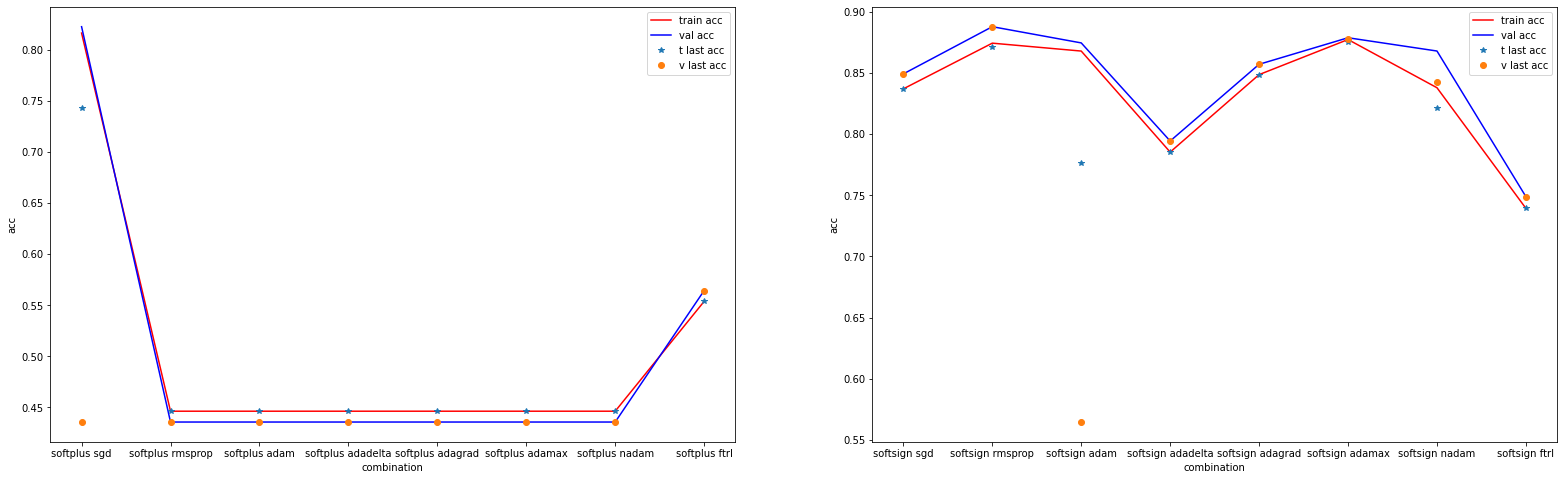

In [ ]:
plt.figure(figsize=(27, 8))
plt.subplot(1,2,1) 
plt.plot(combi[:8], best_accuracy_train_cnn[:8], 'r', label='train acc')
plt.plot(combi[:8], best_accuracy_val_cnn[:8], 'b', label='val acc')
plt.plot(combi[:8], last_accuracy_train_cnn[:8], '*', label='t last acc')
plt.plot(combi[:8], last_accuracy_val_cnn[:8], 'o', label='v last acc')

plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()


plt.subplot(1,2,2) 
plt.plot(combi[8:16], best_accuracy_train_cnn[8:16], 'r', label='train acc')
plt.plot(combi[8:16], best_accuracy_val_cnn[8:16], 'b', label='val acc')
plt.plot(combi[8:16], last_accuracy_train_cnn[8:16], '*', label='t last acc')
plt.plot(combi[8:16], last_accuracy_val_cnn[8:16], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

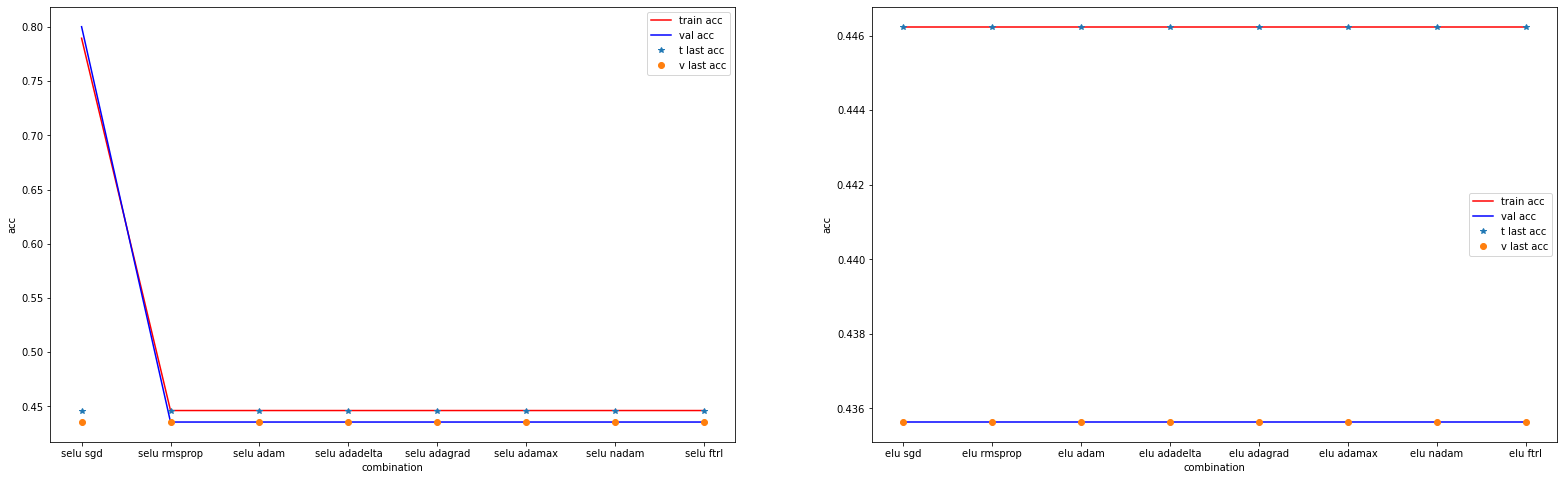

In [ ]:
plt.figure(figsize=(27, 8))
plt.subplot(1,2,1) 
plt.plot(combi[16:24], best_accuracy_train_cnn[16:24], 'r', label='train acc')
plt.plot(combi[16:24], best_accuracy_val_cnn[16:24], 'b', label='val acc')
plt.plot(combi[16:24], last_accuracy_train_cnn[16:24], '*', label='t last acc')
plt.plot(combi[16:24], last_accuracy_val_cnn[16:24], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()


plt.subplot(1,2,2) 
plt.plot(combi[24:32], best_accuracy_train_cnn[24:32], 'r', label='train acc')
plt.plot(combi[24:32], best_accuracy_val_cnn[24:32], 'b', label='val acc')
plt.plot(combi[24:32], last_accuracy_train_cnn[24:32], '*', label='t last acc')
plt.plot(combi[24:32], last_accuracy_val_cnn[24:32], 'o', label='v last acc')

plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

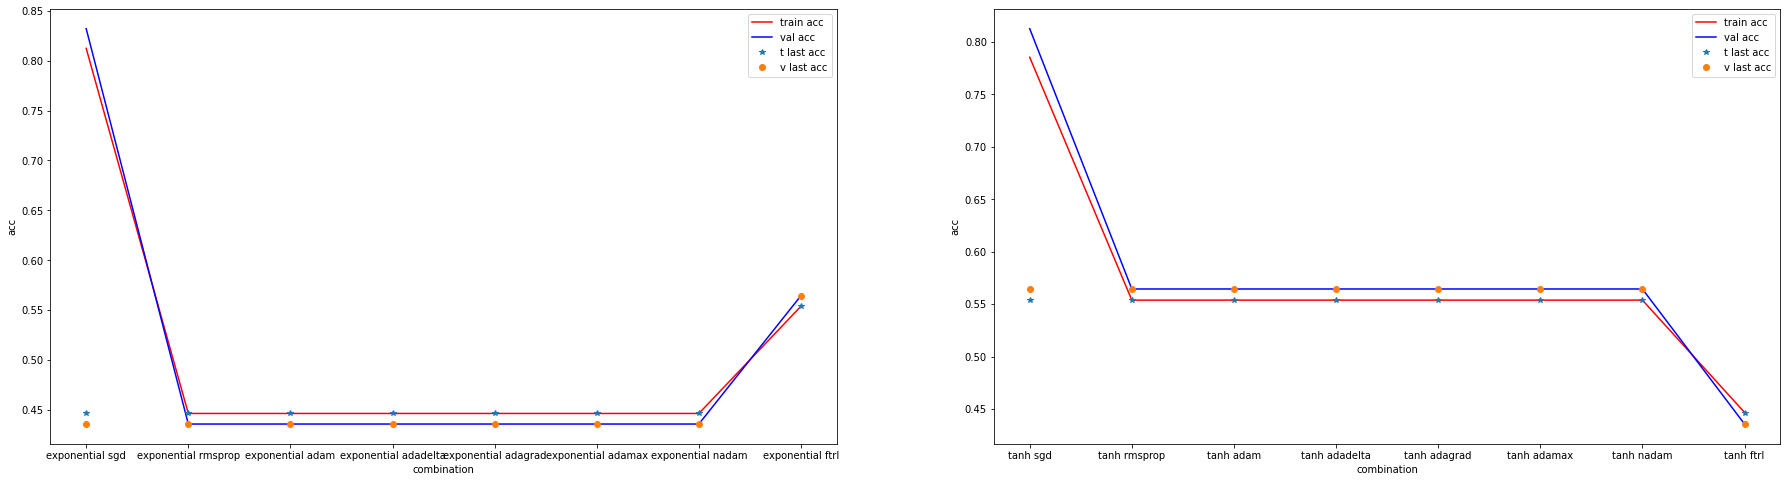

In [ ]:
plt.figure(figsize=(31, 8))
plt.subplot(1,2,1) 
plt.plot(combi[32:40], best_accuracy_train_cnn[32:40], 'r', label='train acc')
plt.plot(combi[32:40], best_accuracy_val_cnn[32:40], 'b', label='val acc')
plt.plot(combi[32:40], last_accuracy_train_cnn[32:40], '*', label='t last acc')
plt.plot(combi[32:40], last_accuracy_val_cnn[32:40], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

plt.subplot(1,2,2) 
plt.plot(combi[40:48], best_accuracy_train_cnn[40:48], 'r', label='train acc')
plt.plot(combi[40:48], best_accuracy_val_cnn[40:48], 'b', label='val acc')
plt.plot(combi[40:48], last_accuracy_train_cnn[40:48], '*', label='t last acc')
plt.plot(combi[40:48], last_accuracy_val_cnn[40:48], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

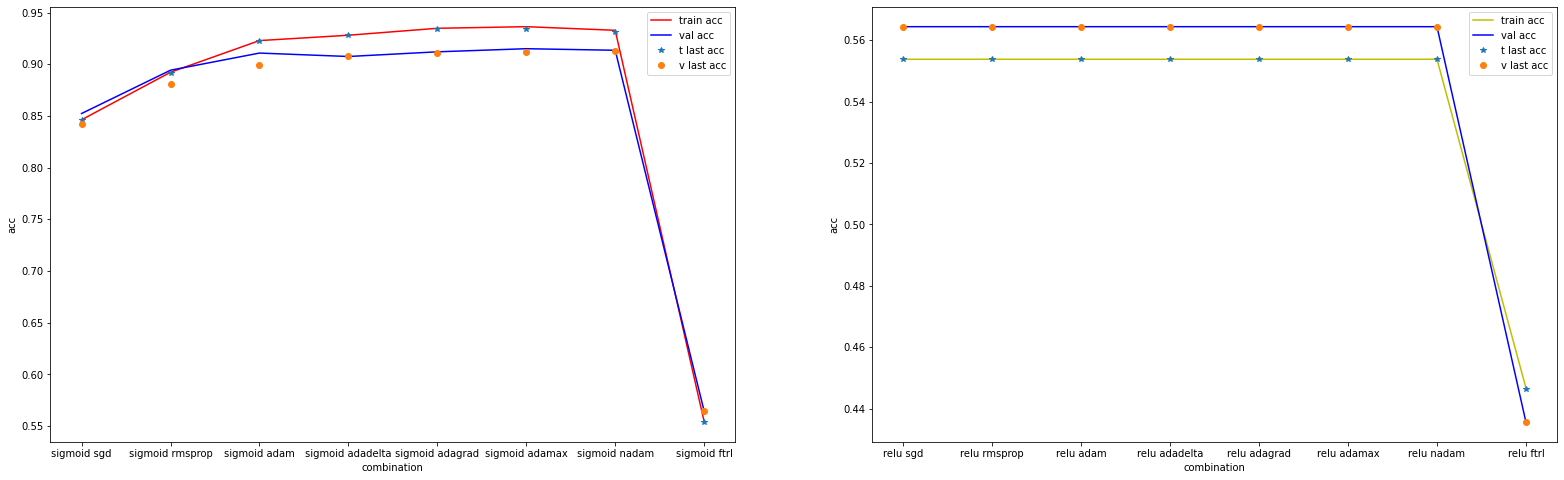

In [ ]:
plt.figure(figsize=(27, 8))

plt.subplot(1,2,1) 
plt.plot(combi[48:56], best_accuracy_train_cnn[48:56], 'r', label='train acc')
plt.plot(combi[48:56], best_accuracy_val_cnn[48:56], 'b', label='val acc')
plt.plot(combi[48:56], last_accuracy_train_cnn[48:56], '*', label='t last acc')
plt.plot(combi[48:56], last_accuracy_val_cnn[48:56], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

plt.subplot(1,2,2)
plt.plot(combi[56:64], best_accuracy_train_cnn[56:64], 'y', label='train acc')
plt.plot(combi[56:64], best_accuracy_val_cnn[56:64], 'b', label='val acc')
plt.plot(combi[56:64], last_accuracy_train_cnn[56:64], '*', label='t last acc')
plt.plot(combi[56:64], last_accuracy_val_cnn[56:64], 'o', label='v last acc')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

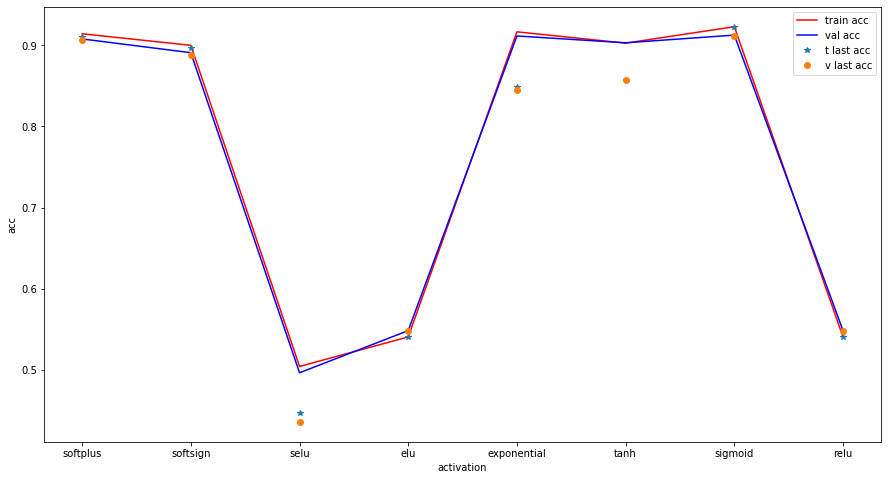

In [ ]:
activation_avg_train_r = []
activation_avg_val_r = []
activation_avg_t_last_r = []
activation_avg_v_last_r = []

for i in range(8):
  activation_avg_train_r.append(sum(best_accuracy_train_r[i*8:(i+1)*8])/8)
  activation_avg_val_r.append(sum(best_accuracy_val_r[i*8:(i+1)*8])/8)
  activation_avg_t_last_r.append(sum(last_accuracy_train_r[i*8:(i+1)*8])/8)
  activation_avg_v_last_r.append(sum(last_accuracy_val_r[i*8:(i+1)*8])/8)

plt.figure(figsize=(15,8))
plt.plot(activation, activation_avg_train_r, 'r', label='train acc')
plt.plot(activation, activation_avg_val_r, 'b', label='val acc')
plt.plot(activation, activation_avg_t_last_r, '*', label='t last acc')
plt.plot(activation, activation_avg_v_last_r, 'o', label='v last acc')
plt.xlabel('activation')
plt.ylabel('acc')
plt.legend()

In [ ]:
np.argmax(best_accuracy_train_cnn), np.max(best_accuracy_train_cnn), np.argmax(last_accuracy_train_cnn), np.max(last_accuracy_train_cnn), np.argmax(best_accuracy_val_cnn), np.max(best_accuracy_val_cnn), np.argmax(last_accuracy_val_cnn), np.max(last_accuracy_val_cnn)

(53,
 0.9362884759902954,
 52,
 0.9344791769981384,
 53,
 0.9149833917617798,
 54,
 0.9125716090202332)

In [ ]:
np.argmin(best_accuracy_train_cnn), np.min(best_accuracy_train_cnn), np.argmin(last_accuracy_train_cnn), np.min(last_accuracy_train_cnn), np.argmin(best_accuracy_val_cnn), np.min(best_accuracy_val_cnn), np.argmin(last_accuracy_val_cnn), np.min(last_accuracy_val_cnn)

(1,
 0.4462393522262573,
 1,
 0.4462393522262573,
 1,
 0.4356346130371094,
 0,
 0.4356346130371094)

In [ ]:
best_accuracy_train_cnn - last_accuracy_train_cnn, best_accuracy_val_cnn - last_accuracy_val_cnn

(array([7.37916827e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.48925591e-03, 9.16257501e-02, 0.00000000e+00,
        0.00000000e+00, 2.06774473e-03, 1.69294477e-02, 0.00000000e+00,
        3.43241155e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.66115272e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.31455147e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.16921282e-04,
        0.00000000e+00, 9.04619694e-04, 6.46173954e-04, 0.00000000e+00,
        2.58505344e-04, 2.19696760e-03, 1.42157078e-03, 5.169510

In [21]:
activation = ['softplus', 'softsign', 'selu', 'elu', 'exponential', 'tanh', 'sigmoid', 'relu']
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
binary_loss = ['binary_crossentropy', 'hinge', 'squared_hinge', loss_fn]

combi = []
for m in activation:
  for opt in optimizers:
    combi.append(m + ' ' + opt)

In [22]:
combi[53], combi[52], combi[8]

('sigmoid adamax', 'sigmoid adagrad', 'softsign sgd')

In [ ]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(1,activation='softsign'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 200, validation_data=(x_test, y_test))

In [27]:
x = x_train
x = x.reshape((7738, 2, 5, 3))
xt = x_test.reshape((3317, 2, 5, 3))
combi[53], combi[52], combi[1]

('sigmoid adamax', 'sigmoid adagrad', 'softplus rmsprop')

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='softplus'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 200, validation_data=(xt, y_test))

In [31]:
combi[53], combi[54], combi[37], combi[53], combi[17], combi[15]

('sigmoid adamax',
 'sigmoid nadam',
 'exponential adamax',
 'sigmoid adamax',
 'selu rmsprop',
 'softsign ftrl')

In [ ]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))

model = keras.Sequential()
model.add(keras.layers.LSTM(128, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(250,activation='relu'))
model.add(keras.layers.Dense(1,activation='selu'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 200, validation_data=(xx, y_test))

In [38]:
#SVC: C = 1.0, kernel = polynomial, degree = 2  
degree = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # polinomial degree
from sklearn.svm import SVC

In [40]:
acc = []
for deg in degree:
  acc.append(SVC(kernel='poly', C = 1, degree=deg).fit(x_train, y_train).predict(x_test))

In [41]:
for a in acc:
  print(accuracy_score(y_test, a))

0.9273439855290926
0.9363883026831474
0.9517636418450407
0.9562858004220681
0.9599035272836901
0.9620138679529695
0.9638227313837805
0.9656315948145915
0.967138981006934
0.96593307205306
